In [37]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, k_means
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [38]:
# Importing the dataset
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [39]:
# Checking for null values
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [40]:
data.shape

(440, 8)

In [41]:
#normalize data
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


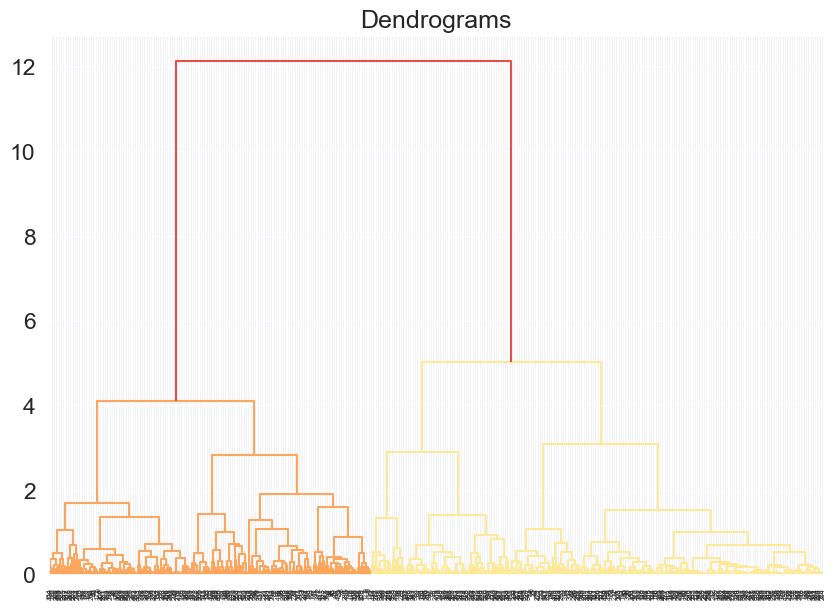

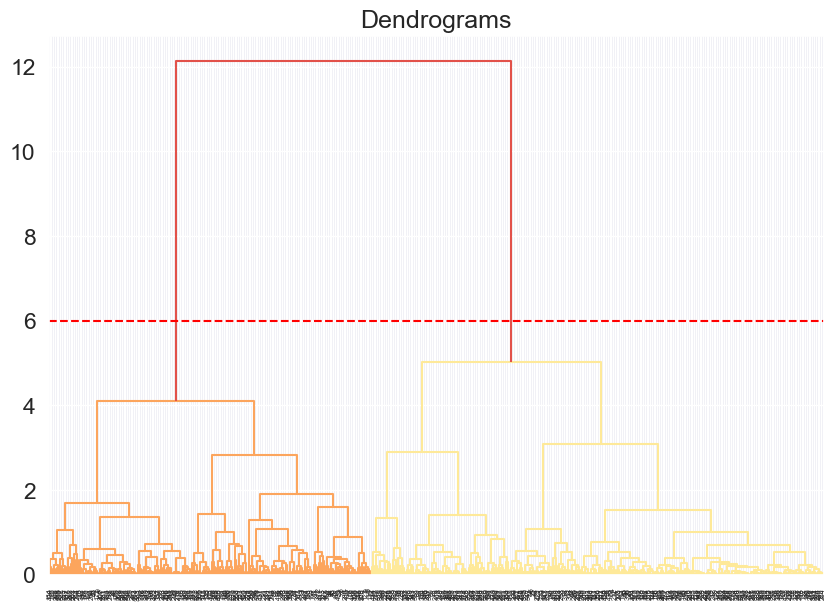

In [42]:
# display the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [43]:
# instantiate agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
#fit cluster to data
y_predict= cluster.fit_predict(data_scaled)


In [44]:
y_predict

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [45]:
data['Clusters']=cluster.labels_

In [46]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


           Channel    Region         Fresh         Milk       Grocery  \
Clusters                                                                
0         1.128405  2.529183  17050.108949  3019.957198   4053.400778   
1         1.595628  2.562842   4908.486339  9695.234973  13425.344262   

               Frozen  Detergents_Paper   Delicassen  
Clusters                                              
0         4069.980545        861.171206  1321.077821  
1         1670.300546       5718.775956  1811.071038  


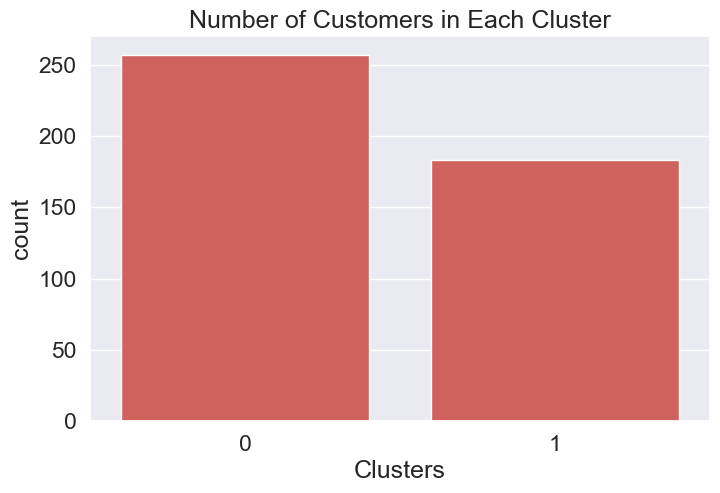

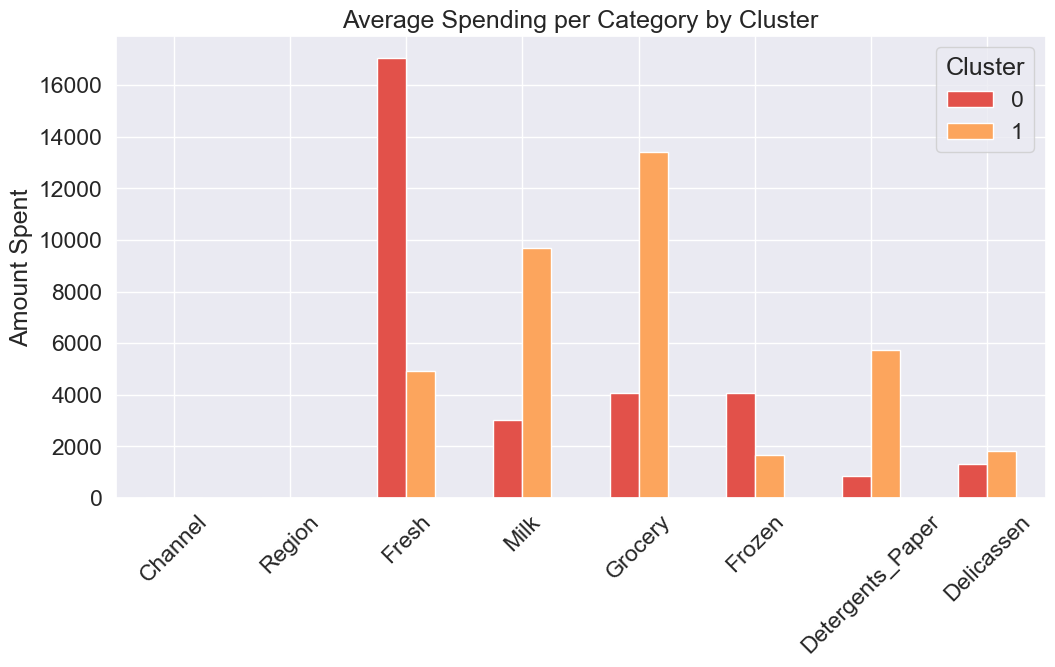

In [49]:
cluster_summary = data.groupby('Clusters').mean()
print(cluster_summary)

plt.figure(figsize=(8, 5))
sns.countplot(x='Clusters', data=data)
plt.title("Number of Customers in Each Cluster")
plt.show()

# Visual comparison of features
cluster_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Spending per Category by Cluster")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

Cluster_Cosine    0    1
Cluster_Ward            
0                20  237
1               150   33


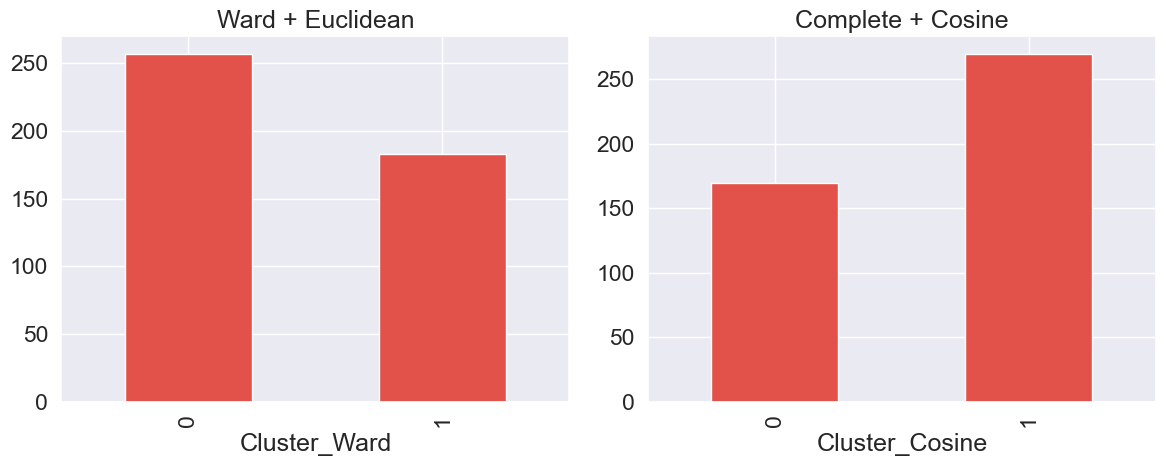

In [58]:
# instantiate agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='cosine')
#fit cluster to data
y_predict= cluster.fit_predict(data_scaled)

# Compare using crosstab
comparison_table = pd.crosstab(data['Cluster_Ward'], data['Cluster_Cosine'])
print(comparison_table)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data['Cluster_Ward'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Ward + Euclidean')
data['Cluster_Cosine'].value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Complete + Cosine')

plt.tight_layout()
plt.show()


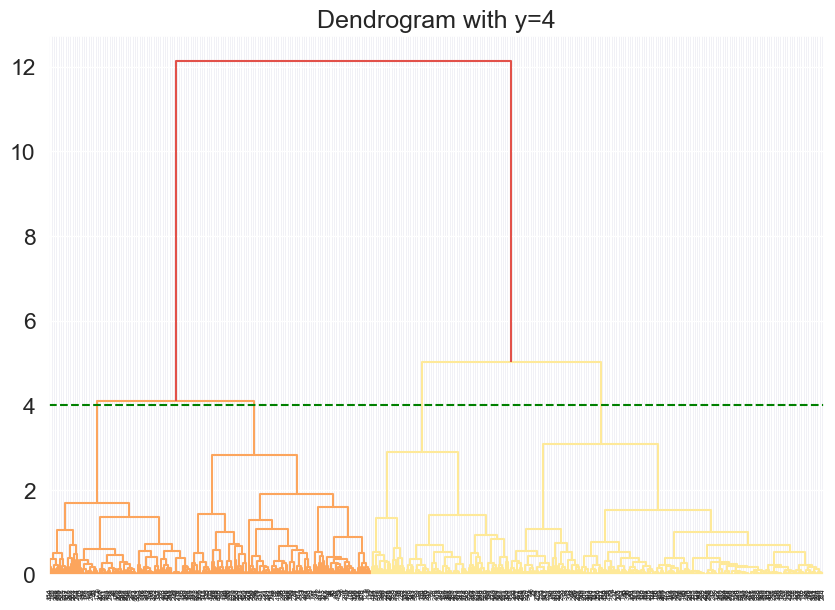

In [61]:
# Display dendrogram with new threshold
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with y=4")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='green', linestyle='--')  # New threshold
plt.show()

In [63]:
# Apply Agglomerative Clustering with 4 clusters based on the dendrogram cutoff
from sklearn.cluster import AgglomerativeClustering

cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['Cluster_4'] = cluster_4.fit_predict(data_scaled)

# Display the count of data points in each of the 4 clusters
print(data['Cluster_4'].value_counts())

Cluster_4
0    178
1    102
3     81
2     79
Name: count, dtype: int64
